# Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ruv.relative_utility_value import relative_utility_value
from ruv.utility_functions import cara
from ruv.economic_models import cost_loss, cost_loss_analytical_spend
from ruv.damage_functions import logistic
from ruv.decision_rules import optimise_over_forecast_distribution

# Synthetic data for this example

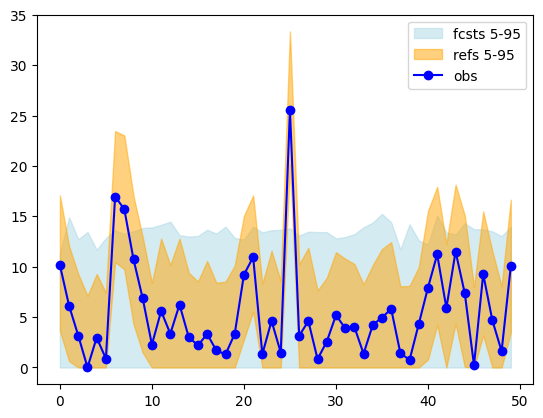

In [107]:
# TODO: load some real data

num_timesteps = 50
ensemble_size = 200

# Gamma distributed observations
obs = np.random.gamma(1, 5, (num_timesteps, 1))
obs[obs < 0] = 0

# Forecasts are observations corrupted by Gaussian noise
fcsts = obs + np.random.normal(0, 4, (num_timesteps, ensemble_size))  # (timesteps, ens_members)
fcsts[fcsts < 0] = 0

# Reference forecast is normal distribution around the obs mean
refs = np.random.normal(np.mean(obs), 5, (num_timesteps, ensemble_size))  # (timesteps, ens_members)
refs[refs < 0] = 0

# Plot the data
plt.fill_between(range(len(obs)), np.quantile(refs, 0.05, axis=1), np.quantile(refs, 0.95, axis=1), color='lightblue', alpha=0.5, label='fcsts 5-95')
plt.fill_between(range(len(obs)), np.quantile(fcsts, 0.05, axis=1), np.quantile(fcsts, 0.95, axis=1), color='orange', alpha=0.5, label='refs 5-95')
plt.plot(obs, marker='o', linestyle='-', color='blue', label='obs')
plt.legend()

# Define decision context

In [108]:
decision_definition = {
    'damage_function': [logistic, {'A': 1, 'k': 0.5, 'threshold': 10}],
    'utility_function': [cara, {'A': 0.3}],
    'economic_model': [cost_loss, cost_loss_analytical_spend, np.arange(0.05, 1, 0.05)],
    'decision_thresholds': np.array([0, 5, 12]),
    'decision_rule': [optimise_over_forecast_distribution, None],
}

# Calculate RUV

In [109]:
results = relative_utility_value(obs, fcsts, refs, decision_definition)

ruv = results['ruv']
alphas = results['economic_model_params']

# Create a value diage

Text(0.5, 1.0, 'Value diagram')

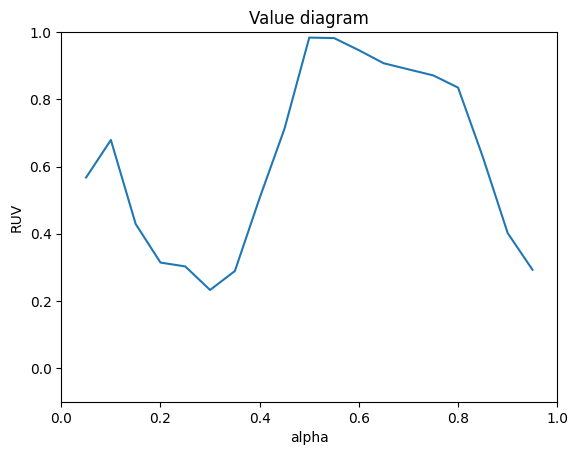

In [110]:
plt.plot(alphas, ruv)
plt.xlim((0, 1))
plt.ylim((-0.1, 1))
plt.ylabel('RUV')
plt.xlabel('alpha')
plt.title('Value diagram')